In [1]:
%pip install tabulate
import numpy as np
import plotly.graph_objects as go
from numpy import pi,cos,sin
from Gra_Jac_Hess import apGrad,apHess
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
from Trust_region_implementation import pDogLeg,pCauchy,mRC1,mRC2
import scipy.linalg as LA
from tabulate import tabulate

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
Note: you may need to restart the kernel to use updated packages.
Imported: Finite Difference Gradient and Hessian (by AW).
Happy iteration 13
[1.00001911 2.99998014]
Happy iteration 1
[1. 3.]


2.1. Dibujar en 3d. Sea f : R2 →Ry el punto inicial ~x0 cerca de un m ́ınimo local ~x?. La matriz
Hessiana en ~x0 sea sim ́etrica y (semi-)definida positiva. Escoge una regi ́on de confianza con ∆ > 0.
Dibuje la gr ́afica en R3 del modelo cuadr ́atico en la regi ́on de la confianza

## Gráfica de f(x) y la refión de confianza

In [2]:
f = lambda x: np.array((x[0]+2*x[1]-7)**2+(2*x[0]+x[1]-5)**2)
x0_211=np.array([-1,0])
delta_211=1
intervals_211 = 16
Delta_211=1.1*delta_211
x_211 = np.linspace(x0_211[0]-Delta_211,x0_211[0]+Delta_211, intervals_211+1)
y_211 = np.linspace(x0_211[1]-Delta_211,x0_211[1]+Delta_211, intervals_211+1)

X_211,Y_211 = np.meshgrid(x_211,y_211)
z_211 = f([X_211,Y_211])

In [3]:
#print(z_fig1.min(),z_fig1.max())
fig1 = go.Figure(data=[
    go.Surface(z=z_211,x=x_211,y=y_211)])
fig1.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig1.update_layout(title='Booth function', autosize=True,
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90))
fig1.show()


In [4]:
T_211,R_211 = np.meshgrid(np.linspace(0,2*pi,60),np.linspace(0,delta_211,16))
X_211p     = R_211*cos(T_211) +x0_211[0]
Y_211p     = R_211*sin(T_211) +x0_211[1]

m_211=f([X_211p,Y_211p])
fig2 = go.Figure(data=[go.Surface(z=m_211,x=X_211p,y=Y_211p,colorscale='Electric')])
fig2.update_layout(title='Trust region with polar coordinates around x0', autosize=True,
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90))
fig2.show()

In [5]:
fig3 = go.Figure()
fig3.add_trace(go.Surface(z=z_211,x=x_211,y=y_211,colorscale='Viridis',opacity=0.5))
fig3.add_trace(go.Surface(z=m_211,x=X_211p,y=Y_211p,colorscale='Electric'))
fig2.update_layout(title='Booth function and Trust region with polar coordinates around x0', autosize=True,
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90))
fig3.show()

## Gráfica 3D del modelo cuádratico y la región de confianza

In [6]:
f = lambda x: np.array((x[0]+2*x[1]-7)**2+(2*x[0]+x[1]-5)**2)
intervals_212=16
delta_0_212=1.5
x0_212=np.array([1,1])
B_0_212=apHess(f,x0_212)
g_0_212=apGrad(f,x0_212)
#m_0=lambda p: f(x0) +g_0.T@np.array([p[0],p[1]]).T+(0.5)*np.array([p[0],p[1]])@B_0@np.array([p[0],p[1]]).T
m_0_212=lambda p: f(x0_212)+g_0_212[0]*p[0]+g_0_212[1]*p[1]+(0.5)*p[0]*(p[0]*B_0_212[0][0]+p[1]*B_0_212[0][1])+(0.5)*p[1]*(p[0]*B_0_212[1][0]+p[1]*B_0_212[1][1])
x_212=np.linspace(x0_212[0]-delta_0_212,x0_212[0]+delta_0_212, intervals_212+1)
y_212=np.linspace(x0_212[1]-delta_0_212,x0_212[1]+delta_0_212, intervals_212+1)
X_212,Y_212=np.meshgrid(x_212,y_212)
z_212=m_0_212([X_212,Y_212])


In [7]:
fig4 = go.Figure(data=[
    go.Surface(z=z_212,x=x_212,y=y_212,colorscale='Electric')])
fig4.update_layout(title='Booth function', autosize=True,
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90))
fig4.show()

In [8]:
T_212,R_212 = np.meshgrid(np.linspace(0,2*pi,60),np.linspace(0,delta_0_212,16))
X_212p     = R_212*cos(T_212) +x0_212[0]
Y_212p     = R_212*sin(T_212) +x0_212[1]

m_212=m_0_212([X_212p,Y_212p])
fig5 =go.Figure(data=[go.Surface(z=m_212,x=X_212p,y=Y_212p,colorscale='Electric')])
fig5.update_layout(title='Trust region with polar coordinates around x0', autosize=True,
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90))
fig5.show()

In [9]:
fig6 = go.Figure()
fig6.add_trace(go.Surface(z=z_212,x=x_212,y=y_212,colorscale='Viridis',opacity=0.5))
fig6.add_trace(go.Surface(z=m_212,x=X_212p,y=Y_212p,colorscale='Electric'))
fig6.update_layout(title='Quadratic model in Trust region with polar coordinates around x0', autosize=True,
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90))
fig6.show()

2.2. Dibujar direcciones en 2d. Sea f : R2 →Ry el punto inicial ~x0 cerca de un m ́ınimo local ~x?.
La matriz Hessiana en ~x0 sea sim ́etrica y (semi-)definida positiva y se usa para definir el modelo
cuadratico en ~x0. Escoge una regi ́on de confianza con ∆ > 0.
Luego haga un plot (en dos dimensiones) que contiene
la frontera de la regi ́on de confianza
algunos conjuntos de nivel en R2 del modelo cuadr ́atico en la regi ́on de la confianza.
los tres direcciones Newton, Cauchy, dogleg. Para obtenerlas use sus funciones pDogLeg, pCauchy.

In [10]:
f = lambda x: np.array((x[0]+2*x[1]-7)**2+(2*x[0]+x[1]-5)**2)
intervals_22 = 132
delta_22=1.5
x0_22=np.array([-1,1])
B_0_22=apHess(f,x0_22)
g_0_22=apGrad(f,x0_22)
m_0_22=lambda p: f(x0_22)+g_0_22[0]*p[0]+g_0_22[1]*p[1]+(0.5)*p[0]*(p[0]*B_0_22[0][0]+p[1]*B_0_22[0][1])+(0.5)*p[1]*(p[0]*B_0_22[1][0]+p[1]*B_0_22[1][1])
x_22 = np.linspace(-5,5, intervals_22+1)
y_22 = np.linspace(-5,5, intervals_22+1).reshape(-1,1)
X_22, Y_22 = np.meshgrid(x_22,y_22)
z_22 = m_0_22([X_22,Y_22])
an = np.linspace(0, 2 * np.pi, 100)
pC=pCauchy(B_0_22,g_0_22,delta_22)
pDL=pDogLeg(B_0_22,g_0_22,delta_22)
pN=-LA.inv(B_0_22)@g_0_22

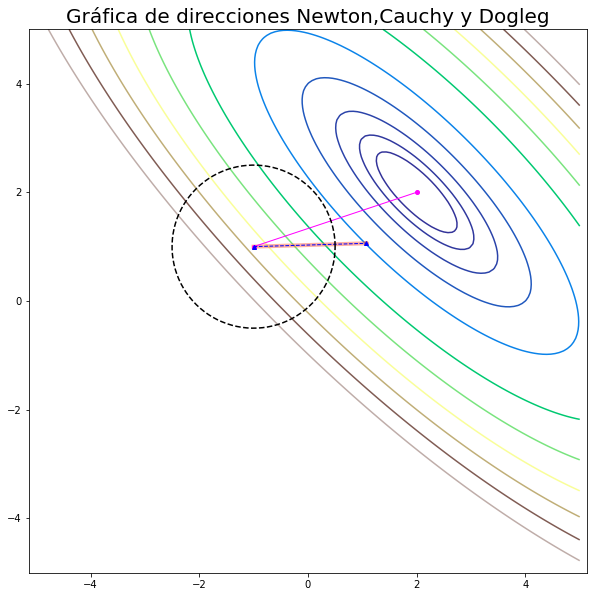

In [11]:
plt.rcParams["figure.figsize"]=(10,10)
fig, ax = plt.subplots()
cs = plt.contour(X_22, Y_22, z_22, levels=[1,2,4,8,16,32,48,64,80,96,112,128],cmap=plt.get_cmap('terrain'))
plt.axis('scaled')


## artifical list of points generated by a method.
xC = np.array([x0_22[0],pC[0]])
yC = np.array([x0_22[1],pC[1]])
xN=np.array([x0_22[0],pN[0]])
yN=np.array([x0_22[1],pN[1]])
xDL=np.array([x0_22[0],pDL[0]])
yDL= np.array([x0_22[1],pDL[1]])
plt.plot( xC, yC, '-o', color='tomato', linewidth=4, markersize=4,alpha=0.5)
plt.plot( xN, yN, '-o', color='magenta', linewidth=1, markersize=4)
plt.plot( xDL, yDL, '--^', color='blue', linewidth=1, markersize=4,alpha=1)
#plt.gca().plot(delta * np.cos(an)+x0[0], delta * np.sin(an)+x0[1],'--')
cir = plt.plot(delta_22 * np.cos(an)+x0_22[0], delta_22 * np.sin(an)+x0_22[1],'--',color="black")
ax.set_aspect('equal', adjustable='datalim')
plt.title("Gráfica de direcciones Newton,Cauchy y Dogleg",fontsize=20)
plt.show()

2.3. Iteraciones y error. Para su funci ́on escoge un punto inicial tal que ‖~x0 −~x?‖2 > ∆max y en
el cual la funci ́on tiene una Hessiana no positiva definida. En el caso, que la funci ́on es globalmente
convexa, escoge una distancia mayor que 5∆max. Despu ́es, para cada m ́etodo haga una tabla que
contiene los  ́ultimos 8 iteraciones con su numero, y los valores ‖∇f(~xk)‖2 y f(~xk).
Adem ́as, en el caso que la soluci ́on  ́optima es conocida mide los  ́ultimos 5 errores: ‖~xk −~x?‖2 .

In [12]:
%%capture
f = lambda x: np.array((x[0]+2*x[1]-7)**2+(2*x[0]+x[1]-5)**2)
x_0_3=np.array([17/2,4])
x_est=np.array([1,3])
L_m1=[]
L_m2=[]
if (x_0_3-x_est).T@((x_0_3-x_est))>(5*(1.5))**2:
    for k in range(55):
        x_m1=mRC1(f,x_0_3,k)
        x_m2=mRC2(f,x_0_3,k)
        L_m1.append([k,x_m1,0,0,0])
        L_m2.append([k,x_m2,0,0,0])

In [13]:
print(len(L_m1[-8:]))
print(len(L_m2[0:8]))
L_m1_T=L_m1[-8:]
L_m2_T=L_m2[0:8]
for j in range(8):
    L_m1_T[j][2]=LA.norm(apGrad(f,L_m1_T[j][1]))
    L_m2_T[j][2]=LA.norm(apGrad(f,L_m2_T[j][1]))
    L_m1_T[j][3]=f(L_m1_T[j][1])
    L_m2_T[j][3]=f(L_m2_T[j][1])
    L_m1_T[j][4]=np.linalg.norm(L_m1_T[j][1]-x_est,ord=2)
    L_m2_T[j][4]=np.linalg.norm(L_m2_T[j][1]-x_est,ord=2)
labels=["Iteracion k","x_{k}","||g_{k}||","f(x_{k})","||x_{k}-x*||"]

8
8


## Tabla del método 1

In [14]:
#método 1
print(tabulate(L_m1_T,headers=labels,tablefmt='fancy_grid'))

╒═══════════════╤═════════════════════════╤═════════════╤═════════════╤════════════════╕
│   Iteracion k │ x_{k}                   │   ||g_{k}|| │    f(x_{k}) │   ||x_{k}-x*|| │
╞═══════════════╪═════════════════════════╪═════════════╪═════════════╪════════════════╡
│            47 │ [1.00010841 2.99986144] │ 0.00051895  │ 3.45903e-08 │    0.000175934 │
├───────────────┼─────────────────────────┼─────────────┼─────────────┼────────────────┤
│            48 │ [1.00011068 2.99990965] │ 0.000384403 │ 2.20669e-08 │    0.000142878 │
├───────────────┼─────────────────────────┼─────────────┼─────────────┼────────────────┤
│            49 │ [1.00006916 2.9999116 ] │ 0.000331065 │ 1.40776e-08 │    0.000112237 │
├───────────────┼─────────────────────────┼─────────────┼─────────────┼────────────────┤
│            50 │ [1.00007061 2.99994236] │ 0.00024523  │ 8.98082e-09 │    9.11493e-05 │
├───────────────┼─────────────────────────┼─────────────┼─────────────┼────────────────┤
│            51 │ [1.

## Tabla del método 2

In [15]:
#método 2
print(tabulate(L_m2_T,headers=labels,tablefmt='fancy_grid'))

╒═══════════════╤═════════════════════════╤═══════════════╤═══════════════╤════════════════╕
│   Iteracion k │ x_{k}                   │     ||g_{k}|| │      f(x_{k}) │   ||x_{k}-x*|| │
╞═══════════════╪═════════════════════════╪═══════════════╪═══════════════╪════════════════╡
│             0 │ [8.5 4. ]               │ 108.577       │ 346.25        │    7.56637     │
├───────────────┼─────────────────────────┼───────────────┼───────────────┼────────────────┤
│             1 │ [7.35335002 3.0329458 ] │  81.7743      │ 203.505       │    6.35344     │
├───────────────┼─────────────────────────┼───────────────┼───────────────┼────────────────┤
│             2 │ [6.18310882 2.09457725] │  55.1227      │ 100.879       │    5.2616      │
├───────────────┼─────────────────────────┼───────────────┼───────────────┼────────────────┤
│             3 │ [4.96978753 1.21261838] │  28.9461      │  38.0055      │    4.35361     │
├───────────────┼─────────────────────────┼───────────────┼───────────

2.4. Visualizar el proceso. Haga una gr ́afica similar a las en el Lab. 3 para visualizar el camino que
tom ́o la sucesi ́on {~xk}.

In [16]:
f = lambda x: np.array((x[0]+2*x[1]-7)**2+(2*x[0]+x[1]-5)**2)
intervals_24 = 132

x_24 = np.linspace(-10, 10, intervals_24+1)
y_24 = np.linspace(-10, 10, intervals_24+1).reshape(-1,1)

X_24, Y_24 = np.meshgrid(x_24,y_24)
z_24 = f([X_24,Y_24])

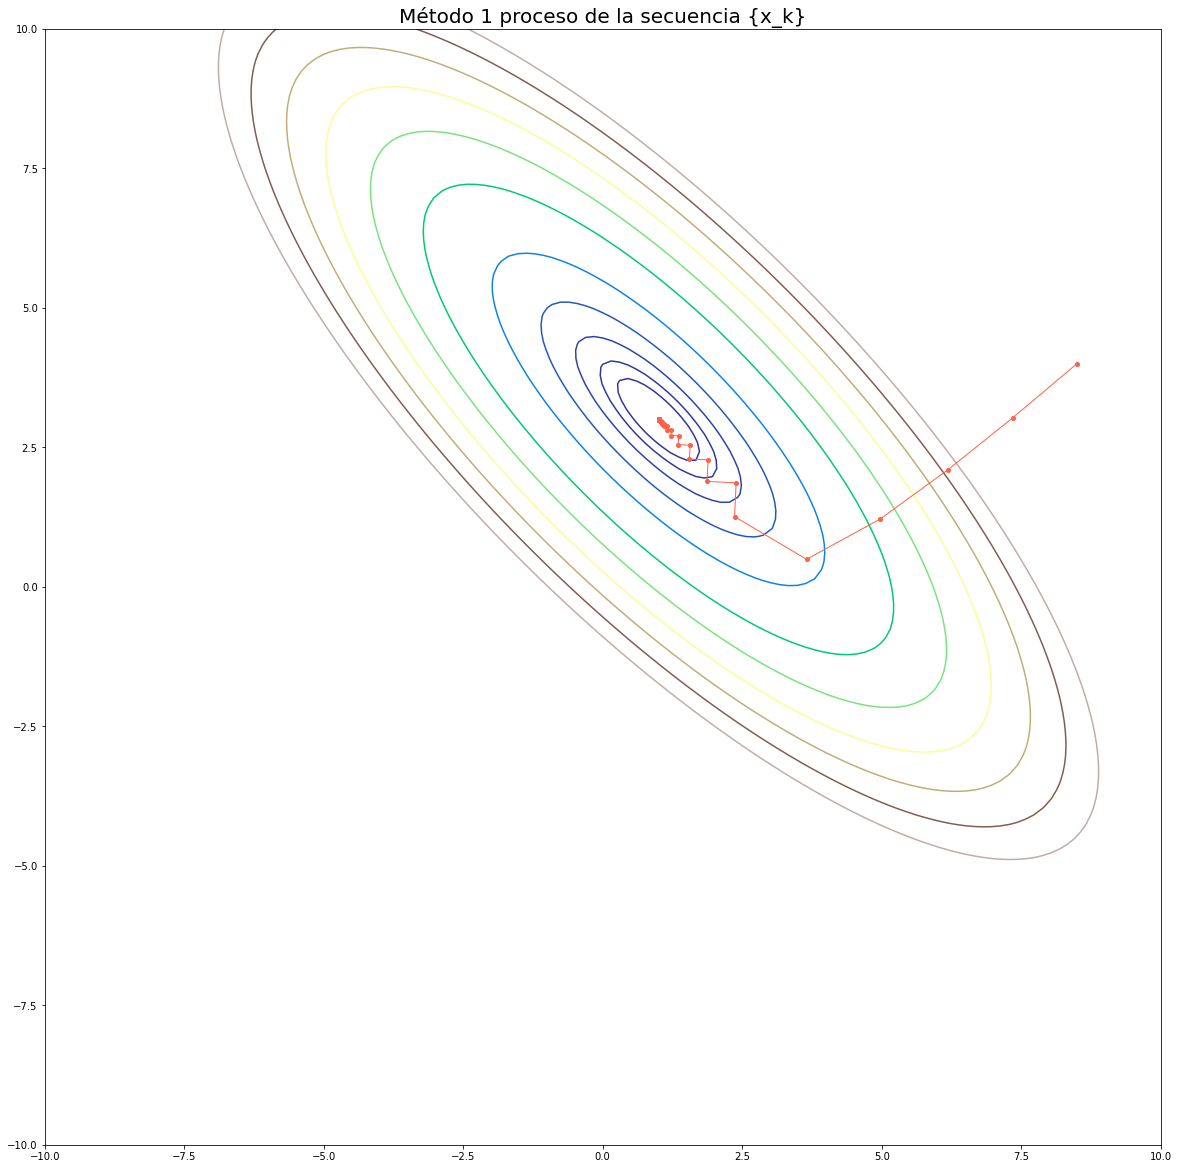

In [17]:
#Método 1
plt.rcParams["figure.figsize"]=(20,50)
cs = plt.contour(X_24, Y_24, z_24, levels=[1,2,4,8,16,32,48,64,80,96,112,128],
                 cmap=plt.get_cmap('terrain'))

#cs = plt.contour(X, Y, z, norm=colors.PowerNorm(gamma=0.5),cmap=plt.get_cmap('terrain'))


plt.axis('scaled')


## artifical list of points generated by a method.
xs = np.array([L_m1[i][1][0] for i in range(len(L_m1)) ])
ys = np.array([L_m1[i][1][1] for i in range(len(L_m1))])
plt.plot( xs, ys, '-o', color='tomato', linewidth=1, markersize=4)
plt.title("Método 1 proceso de la secuencia {x_k}",fontsize=20)
plt.show()
#plt.savefig('testN.pdf')

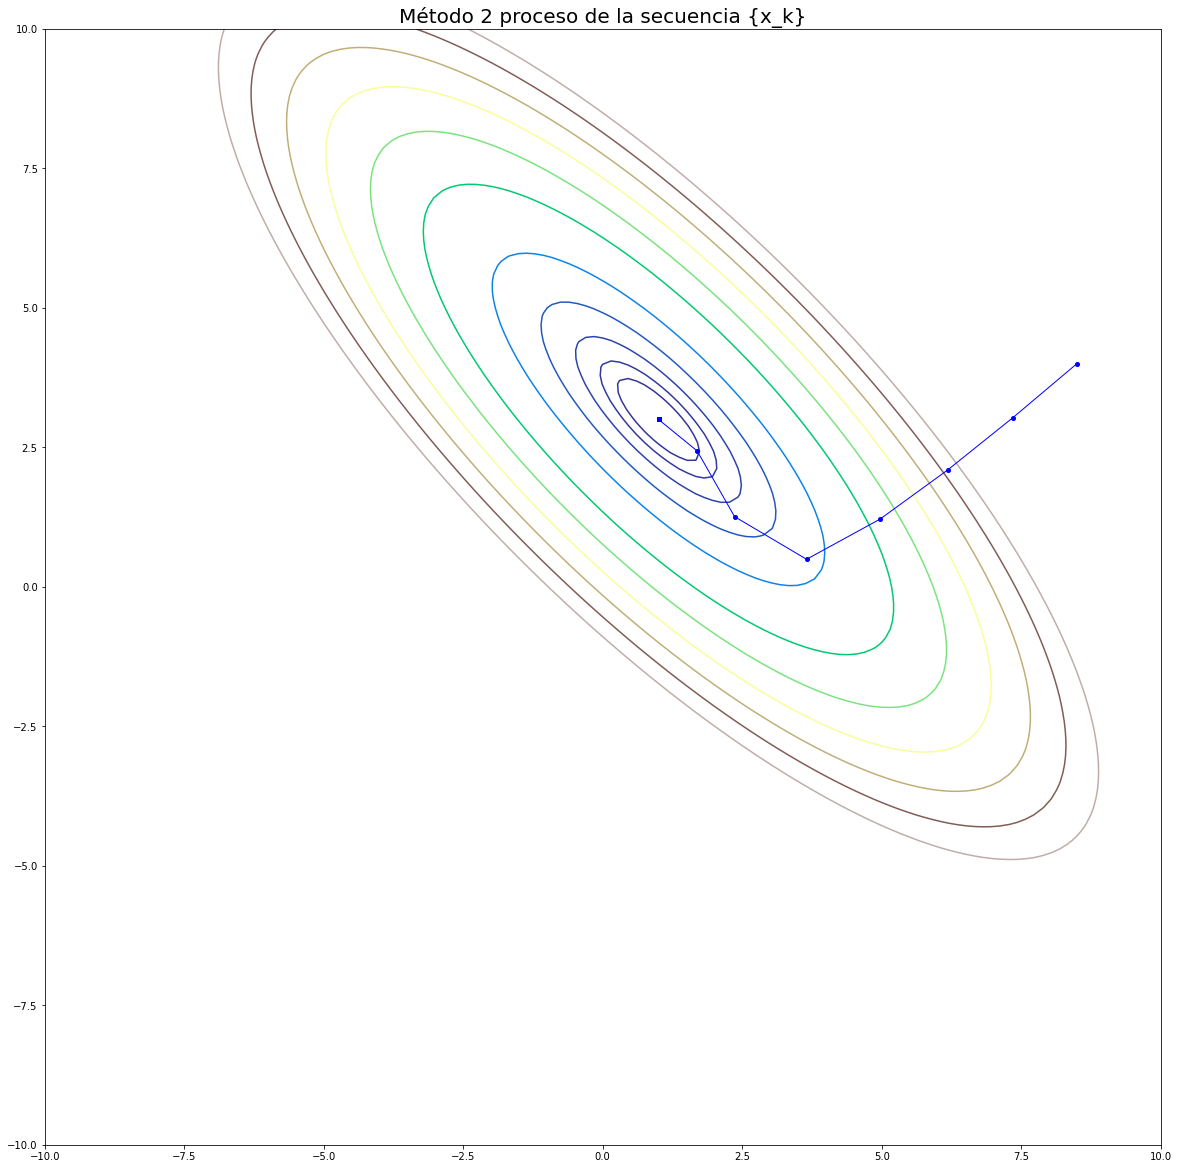

In [18]:
#Método 2
plt.rcParams["figure.figsize"]=(20,50)
cs = plt.contour(X_24, Y_24, z_24, levels=[1,2,4,8,16,32,48,64,80,96,112,128],
                 cmap=plt.get_cmap('terrain'))

#cs = plt.contour(X, Y, z, norm=colors.PowerNorm(gamma=0.5),cmap=plt.get_cmap('terrain'))


plt.axis('scaled')


## artifical list of points generated by a method.
xs = np.array([L_m2[i][1][0] for i in range(len(L_m1)) ])
ys = np.array([L_m2[i][1][1] for i in range(len(L_m1))])
plt.plot( xs, ys, '-o', color='blue', linewidth=1, markersize=4)
plt.title("Método 2 proceso de la secuencia {x_k}",fontsize=20)
plt.show()
#plt.savefig('testN.pdf')